Nama  : Avifah Dwi Cahyani

No    : 05

Kelas : TI-3E

NIM   : 2141720053

# **UTS**
Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. DOWNLOAD
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
3. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
  - Merubah color space
  - Reduksi dimensi
  - dsb
4. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange (Opsional)**
  - Bagaimana cara melakukan evaluasi pada hasil segementasi?
  - Terapkan pada kasus ini!

**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/KULIAH/Semester 5/Machine Learning/UTS/img/1.jpg')

In [9]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

166
380
3


In [10]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(63080, 3)

In [11]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

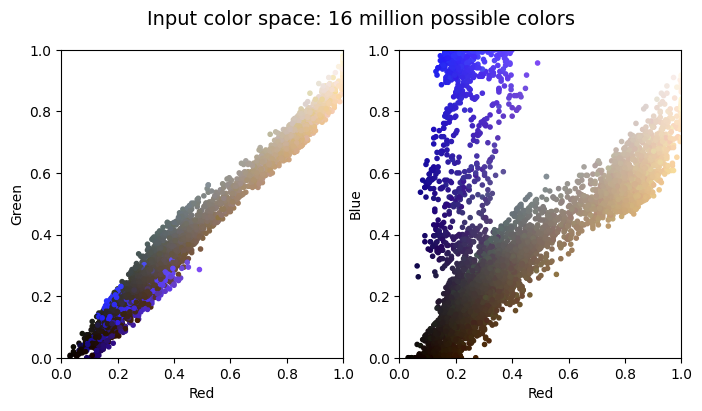

In [12]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [13]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

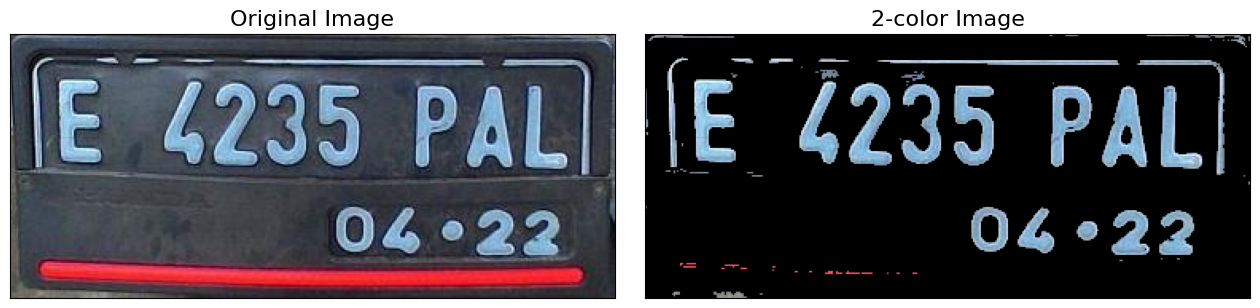

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

## **Plat Nomor 2**

In [15]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/KULIAH/Semester 5/Machine Learning/UTS/img/2.jpg')

In [16]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [17]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [18]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

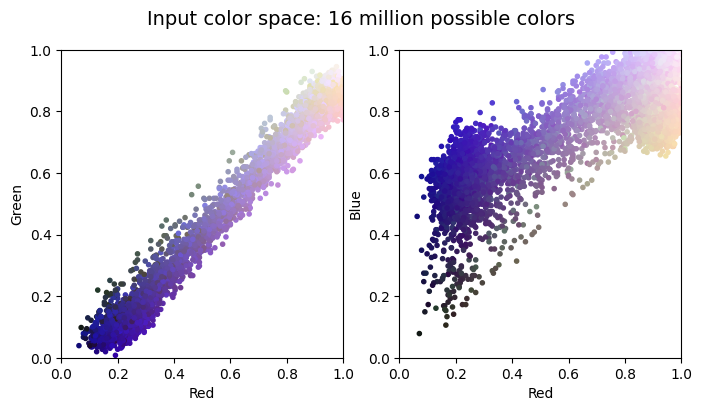

In [19]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [20]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

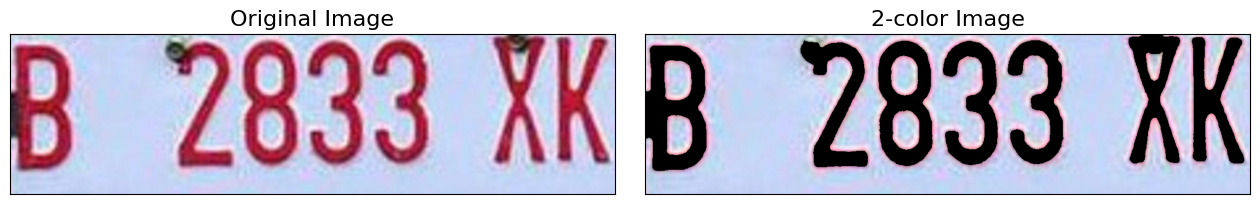

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

## **Plat Nomor 3**

In [22]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/KULIAH/Semester 5/Machine Learning/UTS/img/3.jpg')

In [23]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

258
1101
3


In [24]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

In [25]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

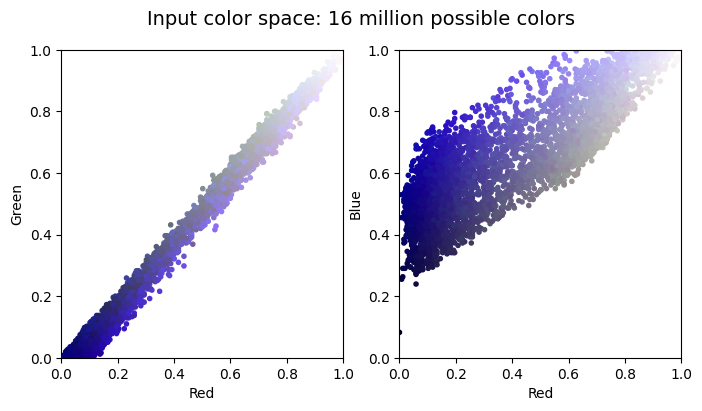

In [26]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [27]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [1, 1, 1]

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

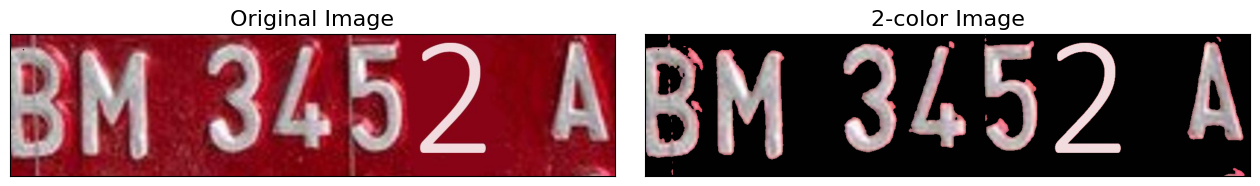

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

## **Plat Nomor 4**

In [29]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/KULIAH/Semester 5/Machine Learning/UTS/img/4.jpg')

In [30]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

343
1183
3


In [31]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(405769, 3)

In [32]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

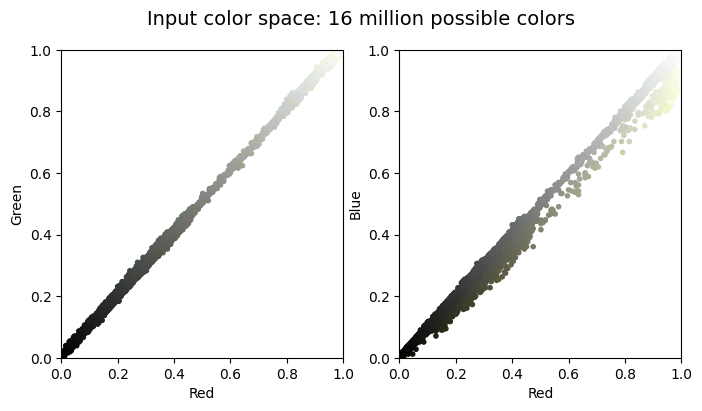

In [33]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [34]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 255]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

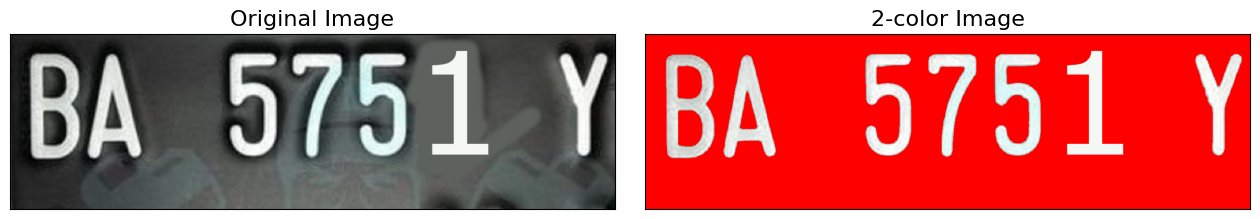

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

## **Plat Nomor 5**

In [49]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/KULIAH/Semester 5/Machine Learning/UTS/img/51.jpg')

In [50]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

247
976
3


In [51]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(241072, 3)

In [52]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

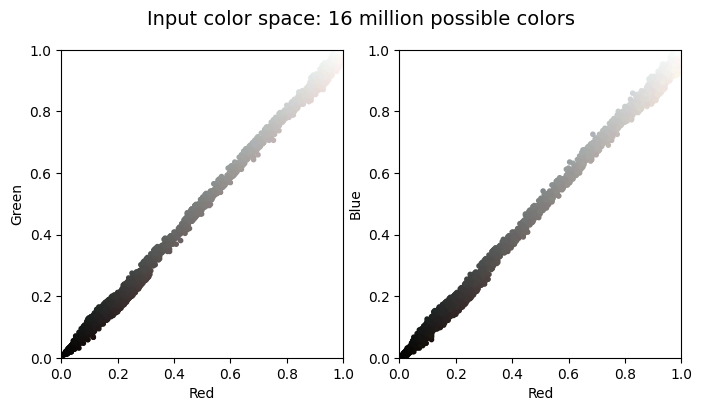

In [53]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [54]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 3
kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

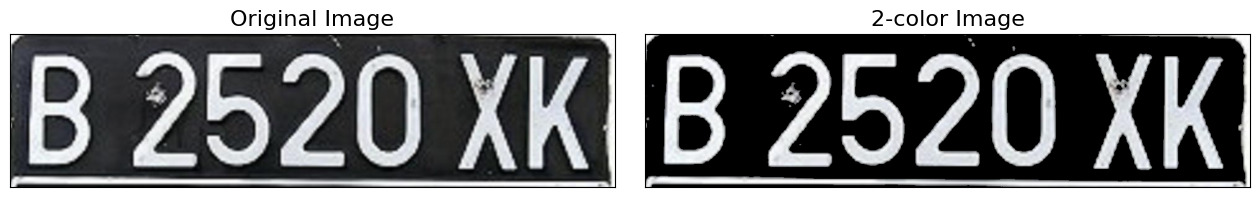

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)